# Computational Science

## Imports 

In [1]:
import pandas as pd #Import Pandas for Dataframes
import seaborn as sns #Import Seaborn for Graphs
import numpy as np #Import numpy for arrays
import math # Import Math for Sqrt,cos and Sin
import random # Import Random for Random Number Generation

# Part 1: Simulating the Robot in 2D Space

## Eulers Algorithm

![Eulers](https://i.imgur.com/MPAQeOI.jpg)

Eulers Algorithm is Used to calulate where the robot is in 2D Space given a set of co-ordinates, a max time and a step size. It calulates the position of x by performing F = -2x+2U Where U is the current step and x is the position. it does this for each step untill the max time is hit. This can then be plotted to give a location and path of the robot in 2D space. By solving the differential equations the robot can be tracked in the space. 

In [50]:
def EulersEquation(U,x): # Eulers Equation  F = -2X+2U used to calulate the value of x in the full algorithm 
    f = -2*x +2*U #Performs the equation 
    return f # Returns the value
   

def IntergationCount (h,i): # Integration Count is used to calulate the difference between the Step size and the sample integral
    OGStep = h # Sets the Original Step size to the value of the step size (this changes later so needs to be constant)
    Count  = 0 # Set count varible to 0, This will be the difference
    S = False # set Start to False 
    if (i == 0):  # if the Sample Integral is not set set S to True
        S = True

    while S == False: # If the sample integral is set calculate the difference
        Count = Count + 1
        if (Count*OGStep == i): #verify if integral size is the correct amount then shut the gate
            S = True
            
    return Count #return the sample size

def Eulers(a,b,h,T,i): #Take in XInit,YInit, Step Size, Time and Sample Intergal
    df1 = pd.DataFrame({"T":[],"X":[],"U":[]}) #declare dataframe structure 
    t =a #Set Time at position 0, Can be higher based on inital Entry
    x= b  # Set x at position 0, Can be higher based on inital Entry
    Count = 0 #set count to 0 used in determing how many to print based on the sample size
    
    IntegrationCount = IntergationCount(h,i) #Calculate the sample size 
    
    while t<T: #while Current time < initial time
        if (t<0 or t<=5): #Set rotbot direction (U) based on where the time is
            U = 2
        elif (t<5 or t<=10):
            U = 1
        elif (t<10 or t<=15):
            U =3
    
        k = h*EulersEquation(U,x) #perform equation stated in the method Eulers Eqation
        x = x +k # add predition to the x value (Plotted later)
        t = t+h #increase step for next result
        Count = Count + 1 # increase count for integral
        
        if (Count >= IntegrationCount): # if the count is at the integral amount add to dataframe
            df2 = pd.DataFrame({"T":[t],"X":[x],"U":[U]}) #get result of eulers in dataframe based on integral steps
            df1 = df1.append(df2) #append to dataframe
            Count = 0 #reset the count to 0
            
    df1.reset_index(inplace=True) # reset the index broken by appending 2 dataframes
    df1 = df1.drop(columns=['index']) #drop the inital index column (Blank)
    return df1 # return dataframe 

def Actual(U,t): #The equation which plots the actual results for the time
    mathst = t*2 # time x2 
    eqat = U - math.exp(-mathst) #U - the exponential of t*2 
    return eqat # return the completed equation

def Actualplot(a,b,h,T): #Plot the actual values 
    dfActual = pd.DataFrame({"T":[],"XActual":[],"U":[]}) #Declare the dataframe
    t =a  # set current time to 0
    x= b #set x at position 0
    
    
    while t<=T: #while Current time < initial time
        if (t<0 or t<=5):#Set rotbot direction (U) based on where the time is
            U = 2
        elif (t<5 or t<=10):
            U = 1
        elif (t<10 or t<=15):
            U =3
    
        k = Actual(U,t) #Calulate the actual x position
        t = t+h #move the step value forward
        dfActual2 = pd.DataFrame({"T":[t],"XActual":[k],"U":[U]}) #fill the dataframe 
        
        dfActual = dfActual.append(dfActual2) #append the dataframe
            
    dfActual.reset_index(inplace=True) #fix the index values of dataframe
    dfActual = dfActual.drop(columns=['index'])
    return dfActual

## Perform Eulers 

(Returns as Pandas Dataframe)

In [87]:
print ("Enter xInitial") # Ask the user to input Initial X Value
xInit = float (input())
print ("Enter yInitial") # Ask the user to input Initial Y Value
yInit = float (input())
print ("Enter Step Size") # Ask the user to input Step Size
Step = float (input())
print ("Enter Time") # Ask the user to input Time Value
Time = float (input()) 
print ("Enter Sample Integral (To Print all put 0 )") # Ask the user to input Sample Value
Integration = float (input())


df1 = Eulers(xInit,yInit,Step,Time,Integration) # Perform the Eulers method on those parameters and return a pandas dataframe
df1

Enter xInitial
0
Enter yInitial
0
Enter Step Size
0.1
Enter Time
15
Enter Sample Integral (To Print all put 0 )
0


,T,X,U
0,0.1,0.400000,2.0
1,0.2,0.720000,2.0
2,0.3,0.976000,2.0
3,0.4,1.180800,2.0
4,0.5,1.344640,2.0
...,...,...,...
146,14.7,2.999930,3.0
147,14.8,2.999944,3.0
148,14.9,2.999955,3.0
149,15.0,2.999964,3.0


## Plot graphs

Upper and lower limits for x is 3 and 0, which is in alignment with the upper limit for U (Robot) this means they fit in the same scale and follow a similar path to each other. This can be demonstated by the follwoing graphs

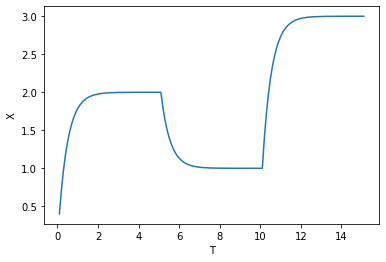

In [88]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots graph of the effects of X over time

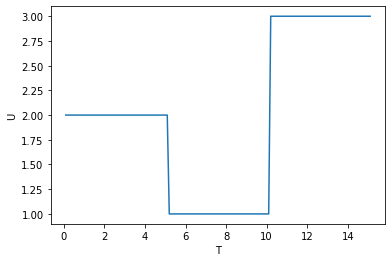

In [89]:
plt2 = sns.lineplot(x="T", y="U", data=df1) # Plots graph on the effect of U Over Time

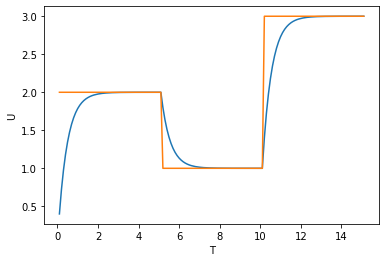

In [90]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots Comparision Graph 
plt2 = sns.lineplot(x="T", y="U", data=df1)
plt1
plt2

## Multiplot for Report 

In [91]:
df2 = Eulers(0,0,1,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df3 = Eulers(0,0,0.75,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df4 = Eulers(0,0,0.5,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df5 = Eulers(0,0,0.25,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df6 = Eulers(0,0,0.01,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df7 = Eulers(0,0,0.001,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe

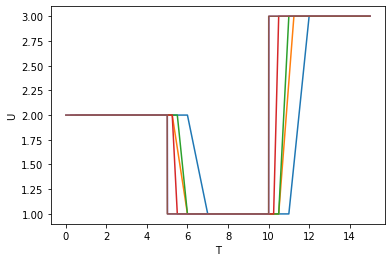

In [92]:
plt3 = sns.lineplot(x="T", y="U", data=df2) #blue 1
plt4 = sns.lineplot(x="T", y="U", data=df3) #Orange 0.75
plt5 = sns.lineplot(x="T", y="U", data=df4) #Green 0.5
plt6 = sns.lineplot(x="T", y="U", data=df5) #Red 0.25
plt7 = sns.lineplot(x="T", y="U", data=df6) #Purple 0.01
plt8 = sns.lineplot(x="T", y="U", data=df7) #Brown 0.001

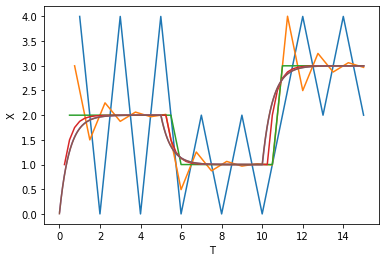

In [93]:
plt9 = sns.lineplot(x="T", y="X", data=df2) #Blue 1
plt10 = sns.lineplot(x="T", y="X", data=df3) #Orange 0.75
plt11 = sns.lineplot(x="T", y="X", data=df4) #Green 0.5
plt12 = sns.lineplot(x="T", y="X", data=df5) #Red 0.25
plt13 = sns.lineplot(x="T", y="X", data=df6) #Purple 0.01
plt14 = sns.lineplot(x="T", y="X", data=df7) #Brown 0.001

## Actual Plot for Report 

In [94]:
dfactual2 = Actualplot (0,0,0.1,15) #plot the actual value of Initialx: 0, InitialY:0, Step: 0.1, time:15
dfactual2 #display dataframe

,T,XActual,U
0,0.1,1.000000,2.0
1,0.2,1.181269,2.0
2,0.3,1.329680,2.0
3,0.4,1.451188,2.0
4,0.5,1.550671,2.0
...,...,...,...
146,14.7,3.000000,3.0
147,14.8,3.000000,3.0
148,14.9,3.000000,3.0
149,15.0,3.000000,3.0


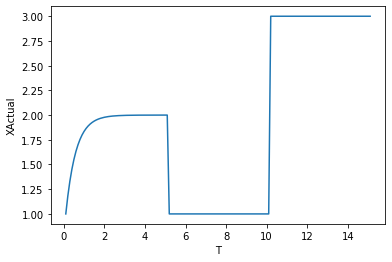

In [95]:
Actualplt = sns.lineplot(x="T", y="XActual", data=dfactual2)  #plot actual results

# Part 2: Adding Noise to Simulation

In order for a fair simulation a level of uncertainty should be added to the data to make predictions more accurate. If the model knows all the correct data then it could predict the exact result which is find but in the real world somethings can change beyond the control and without noise these changes won't be reflected in the simulation. 

below is the code to generate random numbers within a standard deviation of 0.01 and mean of 0 to give a normal distribution of random numbers. The Box Muller algorithm was used to generate these numbers.

## Box Muller Algorithm

In [96]:
standarddev = 0.1 #Target Standard Deviation
meanx = 0 # Target Mean
noise = [] #Noise array
distz1 = [] # Array of distribution of random numbers without modification
distb = [] #Slight modification of random numbers
distz2 = [] #First Set of Random Numbers
distz3 = [] #Second Set of Random Numbers

for ind in df1.index: # For each record in the dataframe
        z1 = random.uniform(0,2*np.pi) # generate a random number between 0 and 2*pi
        distz1.append(z1) # append random numbers to z1 array
        
        #generate a random number between 0 and 1 uniformally generated
        b = standarddev*math.sqrt(-2*math.log(random.uniform(0,1))) 
        distb.append(b) # append unformly generated numbers to array
        
        # calulate the sin of the first random number using the uniform number
        z2 = b*math.sin(z1)+meanx 
        distz2 = [z2] #add random number 1 to array
        
        # calulate the cos of the Second random number using the uniform number
        z3 = b*math.cos(z1)+meanx
        distz3 = [z3] #add random number 2 to array
        
        Xnoise = z2 
        Xnoise2 = z3 

        noise.append(Xnoise)# Add random number 1 to Xnoise
        noise.append(Xnoise2)# Add random number 2 to Xnoise

In [97]:
def BoxMuller (dataframe):
    standarddev = 0.1 #Target Standard Deviation
    meanx = 0 # Target Mean
    noise = [] #Noise array
    distz1 = [] # Array of distribution of random numbers without modification
    distb = [] #Slight modification of random numbers
    distz2 = [] #First Set of Random Numbers
    distz3 = [] #Second Set of Random Numbers

    for ind in dataframe.index: # For each record in the dataframe
            z1 = random.uniform(0,2*np.pi) # generate a random number between 0 and 2*pi
            distz1.append(z1) # append random numbers to z1 array
        
            #generate a random number between 0 and 1 uniformally generated
            b = standarddev*math.sqrt(-2*math.log(random.uniform(0,1))) 
            distb.append(b) # append unformly generated numbers to array
        
            # calulate the sin of the first random number using the uniform number
            z2 = b*math.sin(z1)+meanx 
            distz2 = [z2] #add random number 1 to array
        
            # calulate the cos of the Second random number using the uniform number
            z3 = b*math.cos(z1)+meanx
            distz3 = [z3] #add random number 2 to array
        
            Xnoise = z2 
            Xnoise2 = z3 

            noise.append(Xnoise)# Add random number 1 to Xnoise
            noise.append(Xnoise2)# Add random number 2 to Xnoise
    return noise

## Distribution Plots of Random Numbers 

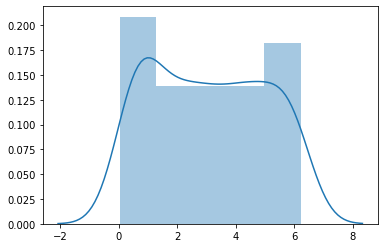

In [98]:
sns.distplot(distz1) #Distribution of random numbers before box muller

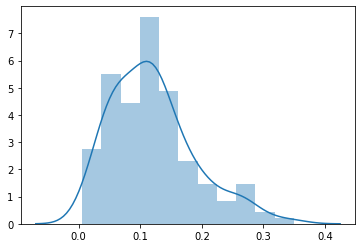

In [99]:
sns.distplot(distb) #Distribution of Random Uniform Numbers between 0 and 1

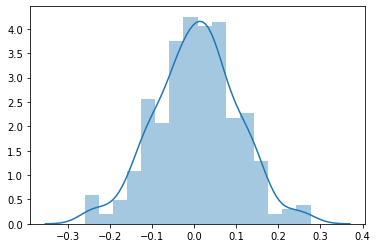

In [100]:
sns.distplot(noise) #Distribution of Standardised Numbers

## Add Noise to Dataframe

In [101]:
dfnoise = pd.DataFrame(noise) #Add noise to dataframe
dfnoise.columns =['Noise'] #Rename Col to Noise
dfnoise # Display Noise

,Noise
0,-0.013071
1,0.117500
2,-0.096422
3,-0.039116
4,-0.086478
...,...
297,-0.075839
298,-0.131974
299,0.151985
300,-0.040815


In [102]:
dfcount = df1['X'].count() # Find count of x (how many in dataframe)

# add to dataframe the number of records in dataframe
dfnoiseshortened = dfnoise[dfnoise["Noise"].index < dfcount] 

df1['Noise'] = dfnoiseshortened # append noise to original dataframe
df1 #show dataframe

,T,X,U,Noise
0,0.1,0.400000,2.0,-0.013071
1,0.2,0.720000,2.0,0.117500
2,0.3,0.976000,2.0,-0.096422
3,0.4,1.180800,2.0,-0.039116
4,0.5,1.344640,2.0,-0.086478
...,...,...,...,...
146,14.7,2.999930,3.0,0.087816
147,14.8,2.999944,3.0,-0.121010
148,14.9,2.999955,3.0,0.114597
149,15.0,2.999964,3.0,-0.032991


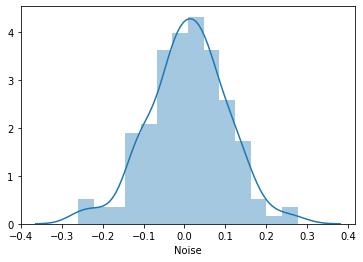

In [103]:
sns.distplot(df1['Noise']) #check if shortened noise still has a normal distrbution

In [104]:
XcombinedNoise =  df1['Noise'] + df1['X'] # Add Noise to the X value
df1['xNoise'] = XcombinedNoise # Add XNoise to dataframe
df1 #Display Dataframe

,T,X,U,Noise,xNoise
0,0.1,0.400000,2.0,-0.013071,0.386929
1,0.2,0.720000,2.0,0.117500,0.837500
2,0.3,0.976000,2.0,-0.096422,0.879578
3,0.4,1.180800,2.0,-0.039116,1.141684
4,0.5,1.344640,2.0,-0.086478,1.258162
...,...,...,...,...,...
146,14.7,2.999930,3.0,0.087816,3.087746
147,14.8,2.999944,3.0,-0.121010,2.878934
148,14.9,2.999955,3.0,0.114597,3.114552
149,15.0,2.999964,3.0,-0.032991,2.966973


In [105]:
Noise = df1['Noise'] #fetch noise values
X = df1['X'] #Fetch x values 
perc = (Noise/X  *100) # Calculate percentage x 
df1['PercentageNoise'] = perc #add percentage to dataframe
df1 # display dataframe 

,T,X,U,Noise,xNoise,PercentageNoise
0,0.1,0.400000,2.0,-0.013071,0.386929,-3.267872
1,0.2,0.720000,2.0,0.117500,0.837500,16.319465
2,0.3,0.976000,2.0,-0.096422,0.879578,-9.879297
3,0.4,1.180800,2.0,-0.039116,1.141684,-3.312704
4,0.5,1.344640,2.0,-0.086478,1.258162,-6.431299
...,...,...,...,...,...,...
146,14.7,2.999930,3.0,0.087816,3.087746,2.927259
147,14.8,2.999944,3.0,-0.121010,2.878934,-4.033740
148,14.9,2.999955,3.0,0.114597,3.114552,3.819955
149,15.0,2.999964,3.0,-0.032991,2.966973,-1.099724


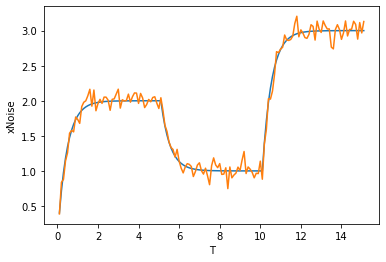

In [106]:
#Plot Effect Noise had on X (Increasing std to 0.1 makes the effect more evident)
Noiseplt = sns.lineplot(x="T", y="X", data=df1)
Noiseplt = sns.lineplot(x="T", y="xNoise", data=df1) 

### Add Noisex to all step size dataframes

In [134]:
noise2 = BoxMuller(df2) # Make Noise for Df2 (Step Size:1) 
dfnoise2 = pd.DataFrame(noise2) #Append Noise to dataframe
dfnoise2.columns =['Noise'] # Rename col to Noise
dfcount2 = df2['X'].count() #Get the count of X (number of entries)
dfnoiseshortened2 = dfnoise2[dfnoise2["Noise"].index < dfcount2] #Half the data to fit the full dataframe
df2['Noise'] = dfnoiseshortened2 # add noise to full dataframe
XcombinedNoise2 =  df2['Noise'] + df2['X'] # add noise to x
df2['xNoise'] = XcombinedNoise2  #add Xnoise to dataframe

noise3 = BoxMuller(df3) # Make Noise for Df3 (Step Size:0.75) 
dfnoise3 = pd.DataFrame(noise3) #Append Noise to dataframe
dfnoise3.columns =['Noise'] # Rename col to Noise
dfcount3 = df3['X'].count() #Get the count of X (number of entries)
dfnoiseshortened3 = dfnoise3[dfnoise3["Noise"].index < dfcount3]  #Half the data to fit the full dataframe
df3['Noise'] = dfnoiseshortened3 # add noise to full dataframe
XcombinedNoise3 =  df3['Noise'] + df3['X'] # add noise to x
df3['xNoise'] = XcombinedNoise3 #add Xnoise to dataframe

noise4 = BoxMuller(df4) # Make Noise for Df4 (Step Size:0.5) 
dfnoise4 = pd.DataFrame(noise4) #Append Noise to dataframe
dfnoise4.columns =['Noise'] # Rename col to Noise
dfcount4 = df4['X'].count() #Get the count of X (number of entries)
dfnoiseshortened4 = dfnoise4[dfnoise4["Noise"].index < dfcount4]  #Half the data to fit the full dataframe
df4['Noise'] = dfnoiseshortened4 # add noise to full dataframe
XcombinedNoise4 =  df4['Noise'] + df4['X'] # add noise to x
df4['xNoise'] = XcombinedNoise4 #add Xnoise to dataframe

noise5 = BoxMuller(df5) # Make Noise for Df5 (Step Size: 0.25) 
dfnoise5 = pd.DataFrame(noise5) #Append Noise to dataframe
dfnoise5.columns =['Noise'] # Rename col to Noise
dfcount5 = df5['X'].count() #Get the count of X (number of entries)
dfnoiseshortened5 = dfnoise5[dfnoise5["Noise"].index < dfcount5]  #Half the data to fit the full dataframe
df5['Noise'] = dfnoiseshortened5 # add noise to full dataframe
XcombinedNoise5 =  df5['Noise'] + df5['X'] # add noise to x
df5['xNoise'] = XcombinedNoise5 #add Xnoise to dataframe

noise6 = BoxMuller(df6) # Make Noise for Df6 (Step Size:0.01) 
dfnoise6 = pd.DataFrame(noise6) #Append Noise to dataframe
dfnoise6.columns =['Noise'] # Rename col to Noise
dfcount6 = df6['X'].count() #Get the count of X (number of entries)
dfnoiseshortened6 = dfnoise6[dfnoise6["Noise"].index < dfcount6] #Half the data to fit the full dataframe
df6['Noise'] = dfnoiseshortened6 # add noise to full dataframe
XcombinedNoise6 =  df6['Noise'] + df6['X'] # add noise to x
df6['xNoise'] = XcombinedNoise6 #add Xnoise to dataframe

noise7 = BoxMuller(df7) # Make Noise for Df7 (Step Size:0.001) 
dfnoise7 = pd.DataFrame(noise7) #Append Noise to dataframe
dfnoise7.columns =['Noise'] # Rename col to Noise
dfcount7 = df7['X'].count() #Get the count of X (number of entries)
dfnoiseshortened7 = dfnoise7[dfnoise7["Noise"].index < dfcount7] #Half the data to fit the full dataframe
df7['Noise'] = dfnoiseshortened7 # add noise to full dataframe
XcombinedNoise7 =  df7['Noise'] + df7['X'] # add noise to x
df7['xNoise'] = XcombinedNoise7 #add Xnoise to dataframe

# Part 3: Predicting the Robot

Finally now the data has noise added to it we can predict using a perceptron how the robot will move in accordance to the actual positon of the robot. Two styles of perceptrons were coded, a step activation perceptron that decides if the output is 0 or 1 and a sgmoid activation perceptron which decides where the data is based on the weights. I do not expect the step function to be able to handle sucha  problem of predicting this robot as it cannot handle values bigger than 1 so will stop climbing at 1. 

## Step Function Perceptron

In [108]:
def SelectedEpoch(Epochnum,PerceptonOutput): #Method to select and add to dataframe which epoch to plot
    totalvalues = df1['X'].count() #Get the count of the x values of the dataframe
    count = -1 # initialise count at -1 so you can start writing at 0
    latch = False # set latch to false
    ChosenEpoch = [] # declare chosen Epoch
    delete = Epochnum*totalvalues - totalvalues #Declare the startpoint of epoch
    delete2 = Epochnum*totalvalues #Declare finish point of epoch
    for x in PerceptonOutput: # loop around the data outputted by the perceptron
        count = count +1 # increase count
        if count == delete: # if count is at startpoint set latch to true so it can write
            latch = True 
        if count == delete2: # if count is at finishpoint set latch to False so it cant write
            latch = False 
        if latch == True: # if latch is true append the x value to the epoch array 
            ChosenEpoch.append(x) 
    return ChosenEpoch #return the data from that epoch

def predict(x, weight): #Declare the perceptron 
    activation = 0  #set the default activation to 0 
    activation = activation + x*weight #times the wight by x and add it to activation 
    return 1 if activation >= 0.5 else 0 # if the result of the activation is greater than or equal to0.5 return true else false

def train_weights_step(array, lr, epoch): #change weights and use perceptron to learn
    network_out = [] #declare the output array
    weights = random.uniform(0,1) #initialise a random weight 
    for epoch in range(epoch): # loop around how many epochs you want 
        for a in array: # for each entry in array 
            prediction = predict(a,weights) #use perceptron to predict output using weight
            network_out.append(prediction) # add prediction to output array
            delta = a - prediction # calulate the error delta
            weights = weights + lr * delta * a # create a new weight calculated by error
            error = delta # set the error to delata
        print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, lr, error)) #print the details of the epoch
    return network_out #return the predicted data


In [109]:
Noisedx  = df1['xNoise'].to_numpy() #set Xnoise to a varible 

print ("Enter Learning Rate") #ask for the learning rate (best at 0.1)
lr = float (input())
print ("Enter Amount of Epochs") #ask for the amount of epochs
Epochnum = int (input())

StepPerceptron = train_weights_step(Noisedx,lr,Epochnum) # train the network using the xnoise varible learning rate and epochs

Enter Learning Rate
0.1
Enter Amount of Epochs
10
epoch=0, lrate=0.100, error=2.130
epoch=1, lrate=0.100, error=2.130
epoch=2, lrate=0.100, error=2.130
epoch=3, lrate=0.100, error=2.130
epoch=4, lrate=0.100, error=2.130
epoch=5, lrate=0.100, error=2.130
epoch=6, lrate=0.100, error=2.130
epoch=7, lrate=0.100, error=2.130
epoch=8, lrate=0.100, error=2.130
epoch=9, lrate=0.100, error=2.130


Enter Selected Epoch
1


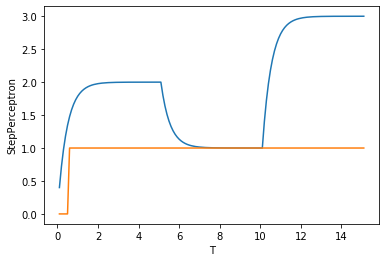

In [110]:
print ("Enter Selected Epoch") #enter epoch you want to graph
SelectedEpochnum = int (input())
EpochStep = SelectedEpoch(SelectedEpochnum,StepPerceptron) #get that epoch

df1['StepPerceptron'] = EpochStep #add epoch to dataframe
df1
Noiseplt = sns.lineplot(x="T", y="X", data=df1) #plot true line 
Stepplt = sns.lineplot(x="T", y="StepPerceptron", data=df1)  #plot neural network plot

## Step Function Perceptron Different Step Sizes 

epoch=0, lrate=0.100, error=1.036
epoch=0, lrate=0.100, error=1.977
epoch=0, lrate=0.100, error=2.057
epoch=0, lrate=0.100, error=1.987
epoch=0, lrate=0.100, error=2.244
epoch=0, lrate=0.100, error=1.966


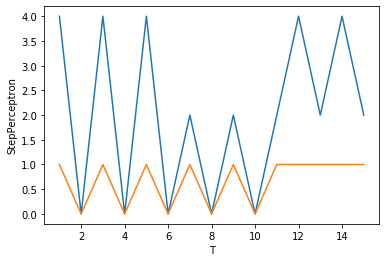

In [111]:
Noisedx2  = df2['xNoise'].to_numpy() #set Xnoise to varible (DF2) Step size (1)
Noisedx3  = df3['xNoise'].to_numpy() #set Xnoise to varible (DF3) Step size (0.75)
Noisedx4  = df4['xNoise'].to_numpy() #set Xnoise to varible (DF4) Step size (0.5)
Noisedx5  = df5['xNoise'].to_numpy() #set Xnoise to varible (DF5) Step size (0.25)
Noisedx6  = df6['xNoise'].to_numpy() #set Xnoise to varible (DF6) Step size (0.01)
Noisedx7  = df7['xNoise'].to_numpy() #set Xnoise to varible (DF7) Step size (0.001)

StepPerceptron2 = train_weights_step(Noisedx2,0.1,1) #Train the Xvalues (DF2) Step Size (1)
StepPerceptron3 = train_weights_step(Noisedx3,0.1,1) #Train the Xvalues (DF3) Step Size (0.75)
StepPerceptron4 = train_weights_step(Noisedx4,0.1,1) #Train the Xvalues (DF4) Step Size (0.5)
StepPerceptron5 = train_weights_step(Noisedx5,0.1,1) #Train the Xvalues (DF5) Step Size (0.25)
StepPerceptron6 = train_weights_step(Noisedx6,0.1,1) #Train the Xvalues (DF6) Step Size (0.01)
StepPerceptron7 = train_weights_step(Noisedx7,0.1,1) #Train the Xvalues (DF7) Step Size (0.001)

df2['StepPerceptron'] = StepPerceptron2 #Add predictions to dataframe (DF2) Step Size (1)
df3['StepPerceptron'] = StepPerceptron3 #Add predictions to dataframe (DF3) Step Size (0.75)
df4['StepPerceptron'] = StepPerceptron4 #Add predictions to dataframe (DF4) Step Size (0.5)
df5['StepPerceptron'] = StepPerceptron5 #Add predictions to dataframe (DF5) Step Size (0.25)
df6['StepPerceptron'] = StepPerceptron6 #Add predictions to dataframe (DF6) Step Size (0.01)
df7['StepPerceptron'] = StepPerceptron7 #Add predictions to dataframe (DF7) Step Size (0.001)

Noiseplt = sns.lineplot(x="T", y="X", data=df2) #plot actual for (DF2) Step Size(1)
Stepplt = sns.lineplot(x="T", y="StepPerceptron", data=df2) # Plot the perceptron output

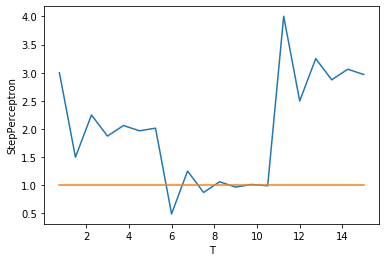

In [112]:
Noiseplt = sns.lineplot(x="T", y="X", data=df3)  #plot actual for (DF3) Step Size(0.75)
Stepplt = sns.lineplot(x="T", y="StepPerceptron", data=df3) # Plot the perceptron output

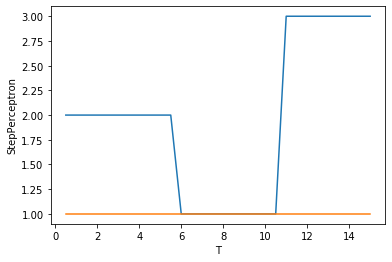

In [113]:
Noiseplt = sns.lineplot(x="T", y="X", data=df4) #plot actual for (DF4) Step Size(0.5)
Stepplt = sns.lineplot(x="T", y="StepPerceptron", data=df4) # Plot the perceptron output

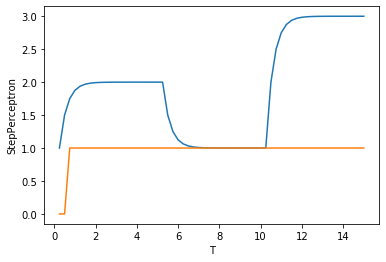

In [114]:
Noiseplt = sns.lineplot(x="T", y="X", data=df5) #plot actual for (DF5) Step Size(0.25)
Stepplt = sns.lineplot(x="T", y="StepPerceptron", data=df5) # Plot the perceptron output

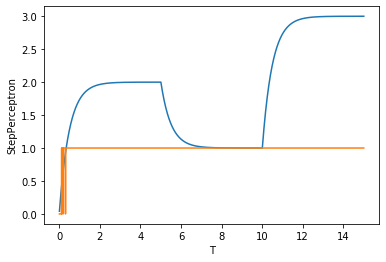

In [115]:
Noiseplt = sns.lineplot(x="T", y="X", data=df6) #plot actual for (DF6) Step Size(0.01)
Stepplt = sns.lineplot(x="T", y="StepPerceptron", data=df6) # Plot the perceptron output

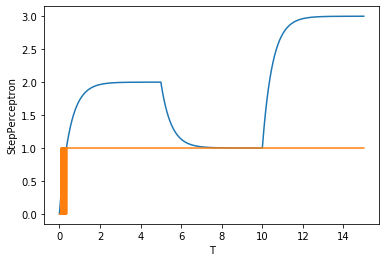

In [116]:
Noiseplt = sns.lineplot(x="T", y="X", data=df7) #plot actual for (DF7) Step Size(0.001)
Stepplt = sns.lineplot(x="T", y="StepPerceptron", data=df7) # Plot the perceptron output

## Step Function Perceptron Learning Rates 

epoch=0, lrate=0.010, error=2.130


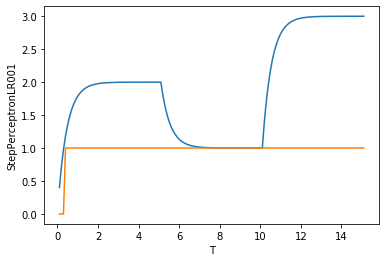

In [117]:
StepPerceptronLR001 = train_weights_step(Noisedx,0.01,1) #Train Perceptron using learning rate 0.01
df1['StepPerceptronLR001'] = StepPerceptronLR001 # add learning rate 0.01 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1)  # plot actual
Stepplt = sns.lineplot(x="T", y="StepPerceptronLR001", data=df1) #plot predicted 

epoch=0, lrate=0.100, error=2.130


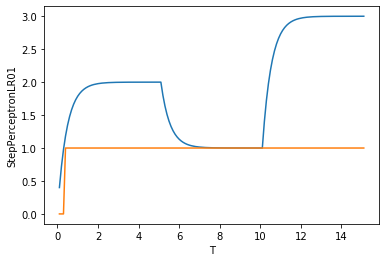

In [118]:
StepPerceptronLR01 = train_weights_step(Noisedx,0.1,1) #Train Perceptron using learning rate 0.1
df1['StepPerceptronLR01'] = StepPerceptronLR001 # add learning rate 0.1 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1) # plot actual
Stepplt = sns.lineplot(x="T", y="StepPerceptronLR01", data=df1)  #plot predicted 

epoch=0, lrate=0.250, error=2.130


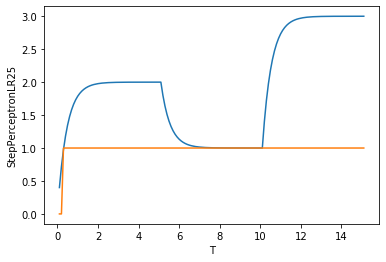

In [119]:
StepPerceptronLR25 = train_weights_step(Noisedx,0.25,1) #Train Perceptron using learning rate 0.25
df1['StepPerceptronLR25'] = StepPerceptronLR25 # add learning rate 0.25 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1)  # plot actual
Stepplt = sns.lineplot(x="T", y="StepPerceptronLR25", data=df1) #plot predicted 

epoch=0, lrate=0.500, error=2.130


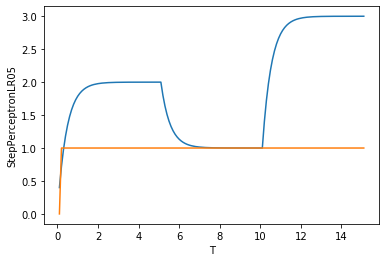

In [120]:
StepPerceptronLR05 = train_weights_step(Noisedx,0.5,1) #Train Perceptron using learning rate 0.5
df1['StepPerceptronLR05'] = StepPerceptronLR05 # add learning rate 0.5 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1)   # plot actual
Stepplt = sns.lineplot(x="T", y="StepPerceptronLR05", data=df1) #plot predicted 

epoch=0, lrate=1.000, error=2.130


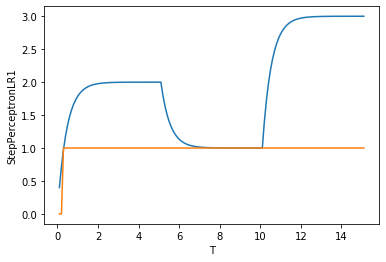

In [121]:
StepPerceptronLR1 = train_weights_step(Noisedx,1,1) #Train Perceptron using learning rate 1
df1['StepPerceptronLR1'] = StepPerceptronLR1 # add learning rate 1 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1) # plot actual
Stepplt = sns.lineplot(x="T", y="StepPerceptronLR1", data=df1) #plot predicted 

## Sigmoid Function Perceptron

In [198]:
def sigmoid_activation(val):#Calulate sigmoid function
  sigmoid = 1/1+np.exp(-val) #Calculate Sigmoid
  return sigmoid #return calulation

def predict(noise2,weights2): #Perceptron using sigmoid activation
    net_sum = 0 #set net sum to 0 
    net_sum = weights2[0] # initiate net sum with bias weight 
    net_sum += weights2[1]*noise2 #calculate x value using x and weight
    activation2 = sigmoid_activation(net_sum) # calculate sigmoid 
    return activation2, net_sum #return activation value and calculated x value

def train_weights_sigmoid(array, lr, loops): #Training method with sigmoid
    weights3 = [-0.10,random.uniform(0,1)] #Initialise bias weight at -0.10 and random other weight
    for loop in range(loops): #for each epoch
        net_array = [] #decalre output array
        sum_error = 0.0 #declare error at 0 
        for a in array: #for each entry in epoch
            prediction, netwrk_sum = predict(a,weights3) #set prediction and network sum to the output of the activation
            Target = a # set target to a value (original x value)
            delta = Target - prediction # calculate delta
            error = delta #set error to delta
            net_array.append(prediction) #append prediction of x to array
            weights3_change_bias= -lr*Target*error #calulate bias weight using error 
            weights3[0] = weights3[0] + weights3_change_bias #change the bias weight
            weights3_change= -lr*Target*error #calculate weight using error
            weights3[1] = weights3[1] + weights3_change #change the normal weight
            sum_error += error**2 # calcualte total error
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (loop, lr, error)) #print the epoch information
    return net_array #return results of trained data

In [123]:
print ("Enter Learning Rate") #Ask for learning rate
lr = float (input()) 
print ("Enter Amount of Epochs") #ask for amount of epochs  
Epochnum = int (input())

SigmoidPerceptron = train_weights_sigmoid(Noisedx,lr,Epochnum) #train the data

Enter Learning Rate
0.1
Enter Amount of Epochs
10
>epoch=0, lrate=0.100, error=1.825
>epoch=1, lrate=0.100, error=1.825
>epoch=2, lrate=0.100, error=1.825
>epoch=3, lrate=0.100, error=1.825
>epoch=4, lrate=0.100, error=1.825
>epoch=5, lrate=0.100, error=1.825
>epoch=6, lrate=0.100, error=1.825
>epoch=7, lrate=0.100, error=1.825
>epoch=8, lrate=0.100, error=1.825
>epoch=9, lrate=0.100, error=1.825


Enter Selected Epoch
1


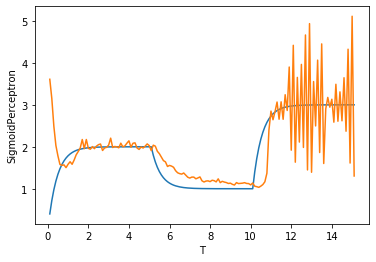

In [124]:
print ("Enter Selected Epoch")  #ask for which epoch to plot
SelectedEpochnum = int (input())
EpochStep = SelectedEpoch(SelectedEpochnum,SigmoidPerceptron)# return the epoch data


df1['SigmoidPerceptron'] = EpochStep #append epoch to dataframe 
df1
Noiseplt = sns.lineplot(x="T", y="X", data=df1) #plot actual data
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptron", data=df1) #plot predicted data 

## Sigmoid Function Perceptron Different Step Sizes 

>epoch=0, lrate=0.100, error=1.036
>epoch=0, lrate=0.100, error=1.945
>epoch=0, lrate=0.100, error=-0.195
>epoch=0, lrate=0.100, error=-1.055
>epoch=0, lrate=0.100, error=0.883
>epoch=0, lrate=0.100, error=-2.189


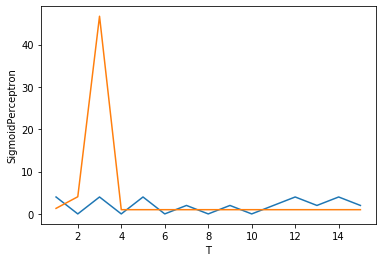

In [125]:
SigmoidPerceptron2 = train_weights_sigmoid(Noisedx2,0.1,1) # Train sigmoid based on step size (1)
SigmoidPerceptron3 = train_weights_sigmoid(Noisedx3,0.1,1) # Train sigmoid based on step size (0.75)
SigmoidPerceptron4 = train_weights_sigmoid(Noisedx4,0.1,1) # Train sigmoid based on step size (0.5)
SigmoidPerceptron5 = train_weights_sigmoid(Noisedx5,0.1,1) # Train sigmoid based on step size (0.25)
SigmoidPerceptron6 = train_weights_sigmoid(Noisedx6,0.1,1) # Train sigmoid based on step size (0.01)
SigmoidPerceptron7 = train_weights_sigmoid(Noisedx7,0.1,1) # Train sigmoid based on step size (0.001)

df2['SigmoidPerceptron'] = SigmoidPerceptron2 #Add results to dataframe
df3['SigmoidPerceptron'] = SigmoidPerceptron3 #Add results to dataframe
df4['SigmoidPerceptron'] = SigmoidPerceptron4 #Add results to dataframe
df5['SigmoidPerceptron'] = SigmoidPerceptron5 #Add results to dataframe
df6['SigmoidPerceptron'] = SigmoidPerceptron6 #Add results to dataframe
df7['SigmoidPerceptron'] = SigmoidPerceptron7 #Add results to dataframe

Noiseplt = sns.lineplot(x="T", y="X", data=df2) #plot actual 
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptron", data=df2) #plot predicted for step size (1) 

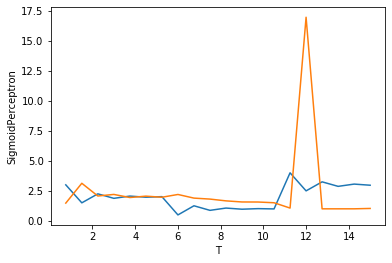

In [126]:
Noiseplt = sns.lineplot(x="T", y="X", data=df3) #plot actual 
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptron", data=df3) #plot predicted for step size (0.75) 

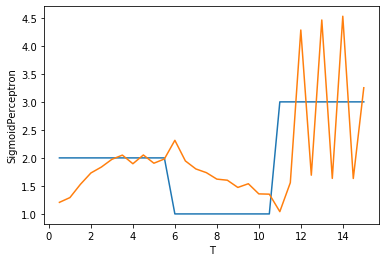

In [127]:
Noiseplt = sns.lineplot(x="T", y="X", data=df4) #plot actual 
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptron", data=df4) #plot predicted for step size (0.5)

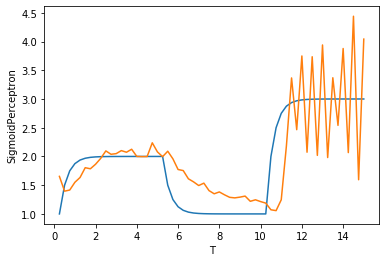

In [128]:
Noiseplt = sns.lineplot(x="T", y="X", data=df5) #plot actual 
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptron", data=df5) #plot predicted for step size (0.25)

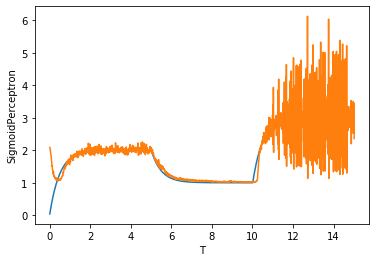

In [129]:
Noiseplt = sns.lineplot(x="T", y="X", data=df6) #plot actual 
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptron", data=df6) #plot predicted for step size (0.01)

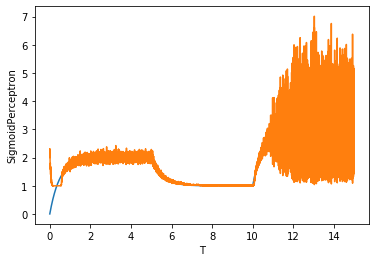

In [130]:
Noiseplt = sns.lineplot(x="T", y="X", data=df7) #plot actual 
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptron", data=df7) #plot predicted for step size (0.001)

## Sigmoid Function Perceptron Different Learning Rates

>epoch=0, lrate=0.010, error=0.121


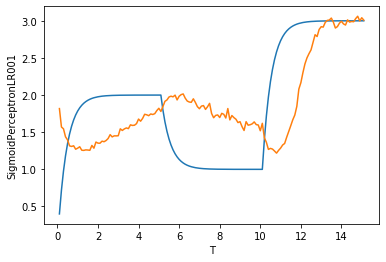

In [131]:
SigmoidPerceptronLR001 = train_weights_sigmoid(Noisedx,0.01,1) #Train perceptron using learning rates 0.01
df1['SigmoidPerceptronLR001'] = SigmoidPerceptronLR001 #add learning rate to dataframe

Noiseplt = sns.lineplot(x="T", y="X", data=df1) #plot actual
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptronLR001", data=df1) #plot predicted

>epoch=0, lrate=0.100, error=1.843


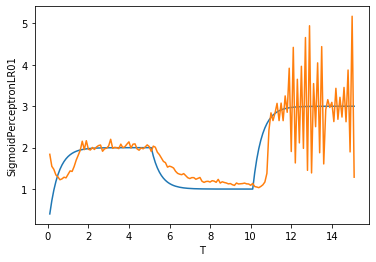

In [132]:
SigmoidPerceptronLR01 = train_weights_sigmoid(Noisedx,0.1,1)  #Train perceptron using learning rates 0.1
df1['SigmoidPerceptronLR01'] = SigmoidPerceptronLR01 #add learning rate to dataframe

Noiseplt = sns.lineplot(x="T", y="X", data=df1)  #plot actual
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptronLR01", data=df1)#plot predicted

>epoch=0, lrate=0.250, error=2.130


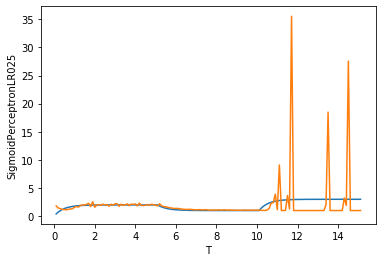

In [133]:
SigmoidPerceptronLR025 = train_weights_sigmoid(Noisedx,0.25,1)  #Train perceptron using learning rates 0.25
df1['SigmoidPerceptronLR025'] = SigmoidPerceptronLR025 #add learning rate to dataframe
 
Noiseplt = sns.lineplot(x="T", y="X", data=df1)  #plot actual
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptronLR025", data=df1) #plot predicted

In [189]:
Arr1 = df1['xNoise'].to_numpy()
Tuples = [[]]
c = 0

while c < len(Arr1):
    if c == 0:
        Tuples.append([0,0,Arr1[c]])
    elif c == 1:
        Tuples.append([0,Arr1[c],Arr1[c-1]])
    else:
        Tuples.append([Arr1[c],Arr1[c-1],Arr1[c-2]])
    c = c + 1

In [197]:
Results = []

for x in Tuples:
    SigmoidPerceptron2 = train_weights_sigmoid(x,0.1,1) #train the data
    Results.append(SigmoidPerceptron2)

UnboundLocalError: local variable 'error' referenced before assignment

In [ ]:
Results